In [1]:

# coding: utf-8

# # Predicting Interest rate using Lending Club dataset

# The dataset used is https://www.kaggle.com/wendykan/lending-club-loan-data

# In[1]:


# for numerical analysis and data processing
import numpy as np
import pandas as pd
import itertools

In [2]:
# In[2]:


# for Machine learning algorithms
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [3]:
# In[3]:


# for vizualizations
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [4]:
# In[4]:


# Reading the files
df = pd.read_csv("loan.csv", low_memory=False)
df_description = pd.read_excel('LCDataDictionary.xlsx').dropna()
df_description.head(20)

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan...
1,annual_inc,The self-reported annual income provided by th...
2,annual_inc_joint,The combined self-reported annual income provi...
3,application_type,Indicates whether the loan is an individual ap...
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding m...
6,delinq_2yrs,The number of 30+ days past-due incidences of ...
7,desc,Loan description provided by the borrower
8,dti,A ratio calculated using the borrower’s total ...
9,dti_joint,A ratio calculated using the co-borrowers' tot...


In [5]:
# In[5]:


# Analysing the first 5 rows
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# In[6]:


# Here we are just taking the first 9999 rows for analysing
df=df[0:9999]

In [7]:
# In[7]:


# Drop off the columns that are not required
df=df.drop(['pymnt_plan', 'url','initial_list_status', 'last_pymnt_amnt',
            'policy_code','zip_code','id', 'member_id','funded_amnt', 'funded_amnt_inv',
            'emp_title','issue_d','desc','title','earliest_cr_line','mths_since_last_delinq', 'mths_since_last_record','open_acc', 'pub_rec',
            'revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
            'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'], axis=1)

In [8]:

df.dropna(axis=1,how='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths
0,5000.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.00,Verified,Fully Paid,credit_card,AZ,27.65,0.0,1.0
1,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Charged Off,car,GA,1.00,0.0,5.0
2,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Fully Paid,small_business,IL,8.72,0.0,2.0
3,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Fully Paid,other,CA,20.00,0.0,1.0
4,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.00,Source Verified,Current,other,OR,17.94,0.0,0.0
5,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.00,Source Verified,Fully Paid,wedding,AZ,11.20,0.0,3.0
6,7000.0,60 months,15.96,170.08,C,C5,8 years,RENT,47004.00,Not Verified,Current,debt_consolidation,NC,23.51,0.0,1.0
7,3000.0,36 months,18.64,109.43,E,E1,9 years,RENT,48000.00,Source Verified,Fully Paid,car,CA,5.35,0.0,2.0
8,5600.0,60 months,21.28,152.39,F,F2,4 years,OWN,40000.00,Source Verified,Charged Off,small_business,CA,5.55,0.0,2.0
9,5375.0,60 months,12.69,121.45,B,B5,< 1 year,RENT,15000.00,Verified,Charged Off,other,TX,18.08,0.0,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 16 columns):
loan_amnt              9999 non-null float64
term                   9999 non-null object
int_rate               9999 non-null float64
installment            9999 non-null float64
grade                  9999 non-null object
sub_grade              9999 non-null object
emp_length             9644 non-null object
home_ownership         9999 non-null object
annual_inc             9999 non-null float64
verification_status    9999 non-null object
loan_status            9999 non-null object
purpose                9999 non-null object
addr_state             9999 non-null object
dti                    9999 non-null float64
delinq_2yrs            9999 non-null float64
inq_last_6mths         9999 non-null float64
dtypes: float64(7), object(9)
memory usage: 1.2+ MB


In [10]:
print(df.shape)

(9999, 16)


In [12]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths'],
      dtype='object')

In [13]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'],
      dtype=object)

In [15]:
df['loan_status'].value_counts()

Fully Paid            7487
Charged Off           1516
Current                956
Late (31-120 days)      24
In Grace Period          8
Late (16-30 days)        6
Default                  2
Name: loan_status, dtype: int64

In [16]:

df=df.replace({'loan_status':'Fully Paid'},0,regex=True)

In [17]:
df=df.replace({'loan_status':'Charged Off'},1,regex=True)

In [18]:

df=df.replace({'loan_status':'Current'},0,regex=True)

In [19]:
df=df.replace({'loan_status':'Late (31-120 days)'},1)


# In[18]:


df=df.replace({'loan_status':'In Grace Period'},1)


# In[19]:


df=df.replace({'loan_status':'Late (16-30 days)'},1)


# In[20]:


df=df.replace({'loan_status':'Default'},1)


# In[21]:


#Renaming the column 'loan_status' to 'loan_status_Binary'
df = df.rename(columns={'loan_status': 'loan_status_Binary'})

In [20]:
df['loan_status_Binary'].astype(int)


# In[23]:


df.info()


# In[24]:


df['loan_status_Binary'].value_counts()


# In[25]:


df.head()


# In[26]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 16 columns):
loan_amnt              9999 non-null float64
term                   9999 non-null object
int_rate               9999 non-null float64
installment            9999 non-null float64
grade                  9999 non-null object
sub_grade              9999 non-null object
emp_length             9644 non-null object
home_ownership         9999 non-null object
annual_inc             9999 non-null float64
verification_status    9999 non-null object
loan_status_Binary     9999 non-null int64
purpose                9999 non-null object
addr_state             9999 non-null object
dti                    9999 non-null float64
delinq_2yrs            9999 non-null float64
inq_last_6mths         9999 non-null float64
dtypes: float64(7), int64(1), object(8)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 16 columns):
loan_amnt     

In [21]:
# To find the correlation between various features, we plot the correlation matrix
def correlation_matrix(df):
    fig = plt.figure(figsize = (10,10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('magma')
    corr = df.corr()
    cax = ax1.imshow(corr, interpolation="nearest", cmap=cmap)
    plt.title('Feature Correlation')
    labels = df.columns.values
    print(labels)
    ax1.set_xticklabels(corr.columns,fontsize=10, rotation=90)
    ax1.set_yticklabels(corr.columns,fontsize=10)
    fig.colorbar(cax)
    plt.show()

['loan_amnt' 'int_rate' 'installment' 'annual_inc' 'loan_status_Binary'
 'dti' 'delinq_2yrs' 'inq_last_6mths']


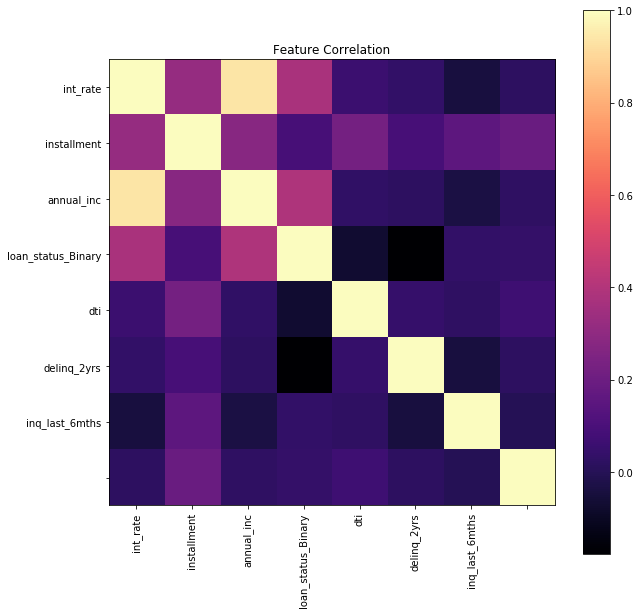

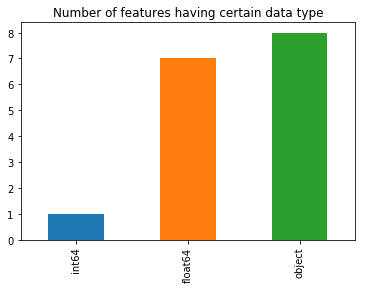

In [22]:
correlation_matrix(df.select_dtypes(include=['float64','int64']))
df.dtypes.value_counts().sort_values().plot(kind='bar')
plt.title('Number of features having certain data type')
plt.show()

In [23]:

p_categories = df['purpose'].cat.categories.tolist()
s_categories = df['addr_state'].cat.categories.tolist()
print(dict( enumerate(df['purpose'].cat.categories) ))

AttributeError: Can only use .cat accessor with a 'category' dtype

In [24]:

p_categories = df['purpose'].cat.categories.tolist()
s_categories = df['addr_state'].cat.categories.tolist()
print(dict( enumerate(df['purpose'].cat.categories) ))

AttributeError: Can only use .cat accessor with a 'category' dtype

In [25]:
numeric_columns = df.select_dtypes(include=['float64','int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].astype('category')

categories={}
for cat in categorical_columns:
    categories[cat] = df[cat].cat.categories.tolist()

In [26]:
p_categories = df['purpose'].cat.categories.tolist()
s_categories = df['addr_state'].cat.categories.tolist()
print(dict( enumerate(df['purpose'].cat.categories) ))

{0: 'car', 1: 'credit_card', 2: 'debt_consolidation', 3: 'home_improvement', 4: 'house', 5: 'major_purchase', 6: 'medical', 7: 'moving', 8: 'other', 9: 'renewable_energy', 10: 'small_business', 11: 'vacation', 12: 'wedding'}


In [27]:

df[categorical_columns] = df[categorical_columns].apply(lambda x: x.cat.codes)

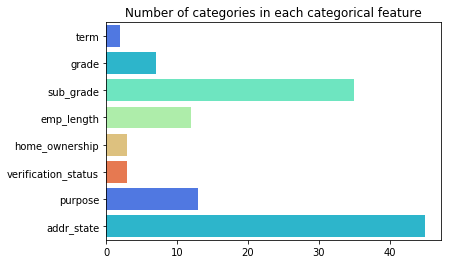

,loan_amnt,int_rate,installment,annual_inc,loan_status_Binary,dti,delinq_2yrs,inq_last_6mths
count,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000
mean,12861.456146,12.428641,363.819195,7.027073e+04,0.155616,13.989643,0.133513,0.849685
std,8492.219046,4.239319,226.220788,4.832171e+04,0.362509,6.612583,0.459694,1.040444
min,1000.000000,5.420000,22.240000,6.000000e+03,0.000000,0.000000,0.000000,0.000000
25%,6000.000000,8.900000,193.580000,4.200000e+04,0.000000,8.940000,0.000000,0.000000
50%,11200.000000,12.420000,322.250000,6.000000e+04,0.000000,14.020000,0.000000,1.000000
75%,17500.000000,15.270000,480.330000,8.450000e+04,0.000000,19.150000,0.000000,1.000000
max,35000.000000,24.110000,1288.100000,1.782000e+06,1.000000,29.920000,6.000000,8.000000


In [28]:
# Barplot
sns.barplot(y = categorical_columns, x = df[categorical_columns].apply(pd.Series.nunique, axis = 0).tolist(), palette=sns.color_palette("rainbow"))
plt.title('Number of categories in each categorical feature')
plt.show()


# In[33]:


df.select_dtypes(include=['float64','int64']).describe()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


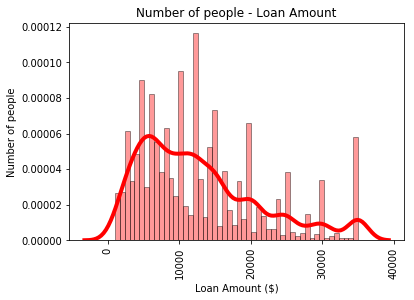

In [29]:
# Histogram and density chart, to understand the distribution
sns.distplot(df['loan_amnt'], hist=True, kde=True, 
             bins=50, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xticks(rotation=90)
plt.title('Number of people - Loan Amount')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Number of people')
plt.show()

In [30]:

print(df['loan_amnt'].describe())

count     9999.000000
mean     12861.456146
std       8492.219046
min       1000.000000
25%       6000.000000
50%      11200.000000
75%      17500.000000
max      35000.000000
Name: loan_amnt, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


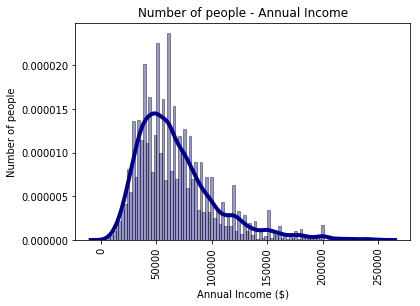

In [31]:
# Histogram and density chart
sns.distplot(df[df['annual_inc'] <250000]['annual_inc'], hist=True, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xticks(rotation=90)
plt.title('Number of people - Annual Income')
plt.xlabel('Annual Income ($)')
plt.ylabel('Number of people')
plt.show()

In [32]:
print(df['annual_inc'].describe())

count    9.999000e+03
mean     7.027073e+04
std      4.832171e+04
min      6.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.450000e+04
max      1.782000e+06
Name: annual_inc, dtype: float64


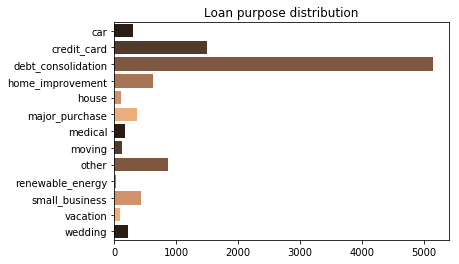

count    9999.000000
mean        3.303230
std         2.923144
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: purpose, dtype: float64


In [33]:
# Bar chart
sns.barplot(y = p_categories, x = df['purpose'].value_counts().sort_index().tolist(), palette=sns.color_palette("copper"))
plt.title('Loan purpose distribution')
plt.show()


# In[39]:


# Summary
print(df['purpose'].describe())

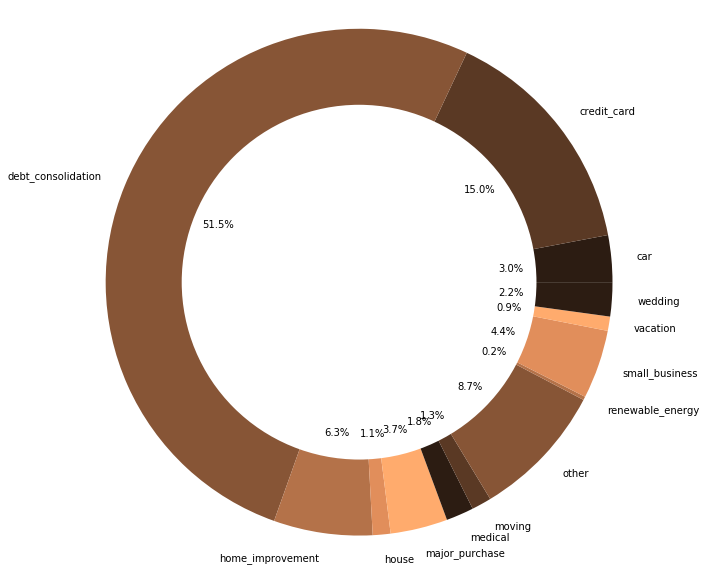

In [34]:
# Pie Chart
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(df['purpose'].value_counts().sort_index().tolist(),
        labels=p_categories,
        autopct='%1.1f%%',
        colors= sns.color_palette("copper"))


# In[41]:


ax1.axis('equal')


# In[42]:


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [35]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

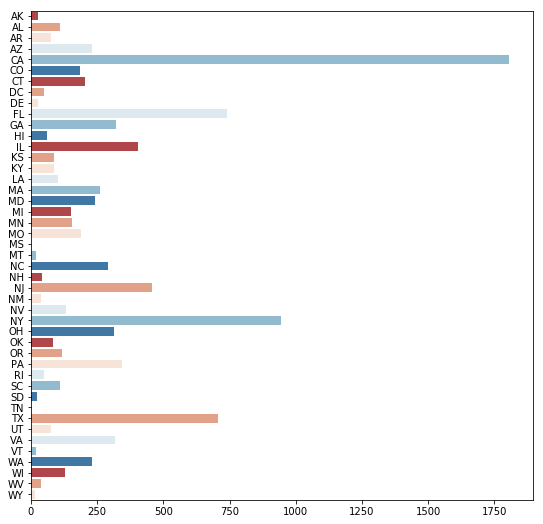

In [36]:

# Bar chart
fig, ax = plt.subplots(figsize=(9,9))
sns.barplot(x=df['addr_state'].value_counts().sort_index().tolist(), y = s_categories, palette=sns.color_palette("RdBu"))
plt.show()

count    9999.000000
mean       18.993199
std        12.703174
min         0.000000
25%         6.000000
50%        17.000000
75%        29.000000
max        44.000000
Name: addr_state, dtype: float64


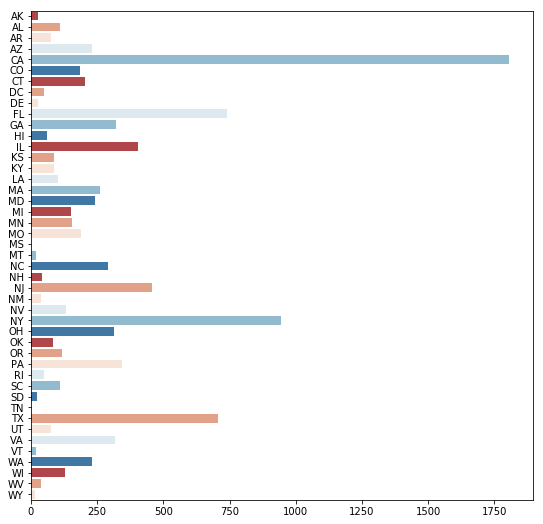

count    9999.000000
mean       18.993199
std        12.703174
min         0.000000
25%         6.000000
50%        17.000000
75%        29.000000
max        44.000000
Name: addr_state, dtype: float64


In [37]:
#Summary
print(df['addr_state'].describe())
# Bar chart
fig, ax = plt.subplots(figsize=(9,9))
sns.barplot(x=df['addr_state'].value_counts().sort_index().tolist(), y = s_categories, palette=sns.color_palette("RdBu"))
plt.show()
get_ipython().show_usage()
#Summary
print(df['addr_state'].describe())

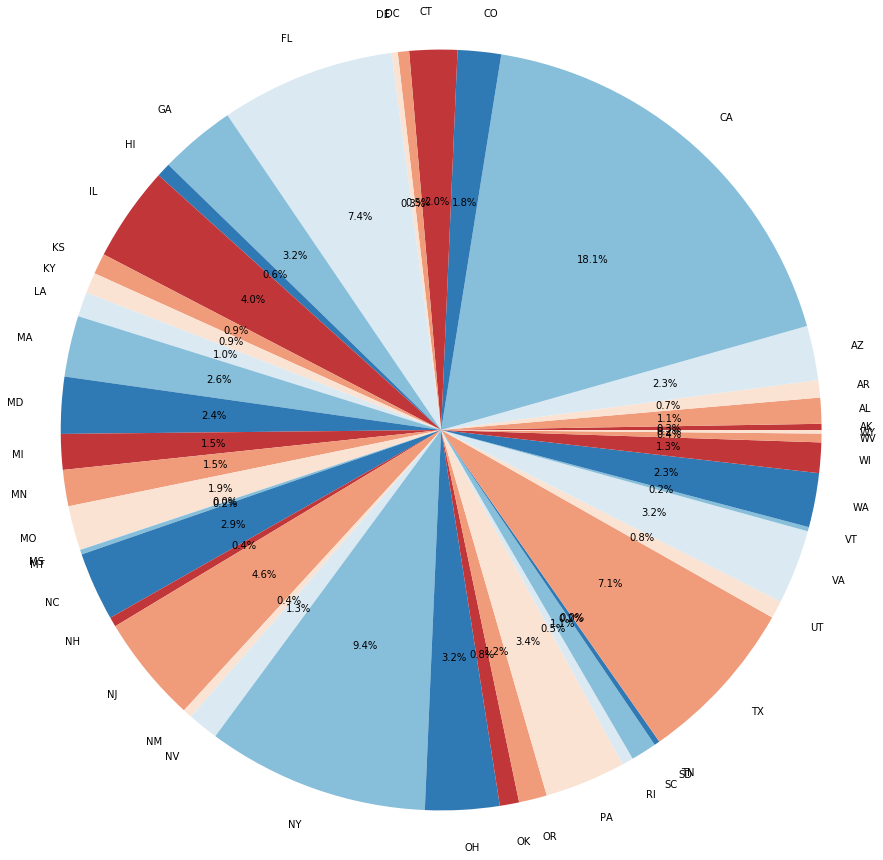

In [38]:
# Circle chart
fig, ax1 = plt.subplots(figsize=(15,15))
# fig = plt.figure(figsize=(10,10))
ax1.pie(df['addr_state'].value_counts().sort_index().tolist(),
        labels=s_categories,
        autopct='%1.1f%%',
        colors= sns.color_palette("RdBu"))


# In[47]:


ax1.axis('equal')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()

In [39]:
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()


# In[49]:


from IPython.display import Image

<Figure size 432x288 with 0 Axes>

In [40]:
# for Machine learning algorithms
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.spatial.distance import cdist

In [41]:
# In[51]:


# for vizualizations
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [42]:
min_rate= df['int_rate'].min()
max_rate= df['int_rate'].max()
print(min_rate, max_rate, max_rate- min_rate)
#Storing Interest rate statistics

5.42 24.11 18.689999999999998


In [43]:

# # Clustering - k-Means Clustering
# The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. According to this algorithm, a simple cluster:
# 
# has a "cluster center" which is the arithmetic mean of all the points belonging to the cluster
# has each point closer to its own cluster center than to other cluster centers
# One of the most important parameters that has to be decided by the user is the value of k, the number of cluster. K random centroids are selected and the centroids are moved with each iteration of the algorithm until all points are assigned a cluster.
# 
# To select the value of K, one of the widely used method is called the Elbow Curve method. Logically, K-Means attempts to minimize distortion defined by the the sum of the squared distances between each observation and its closest centroid. This is called the cost function or distortion. We plot the values of dstortion against K and select where the plot forms an 'elbow joint' i.e. the point after which there is a gradual decrease in the distortion.
# 

# In[53]:


distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df[0:9999])
    kmeanModel.fit(df[0:9999])
    distortions.append(sum(np.min(cdist(df[0:9999], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df[0:9999].shape[0])

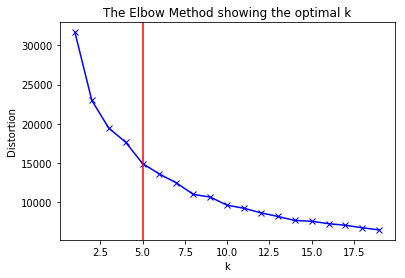

In [44]:
plt.plot(K, distortions, 'bx-')
plt.axvline(5, color='r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [45]:
num_clusters = 5
num_samples = 9999

In [46]:

kmeans = KMeans(n_clusters=num_clusters, algorithm='elkan')
kmeans.fit(df[0:num_samples])

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:

unique, counts = np.unique(kmeans.labels_, return_counts=True)
cluster_indices = np.asarray((unique, counts)).T[:,1].argsort()[-3:][::-1] # change -3 to -5 for all clusters

In [48]:
print('Samples per cluster:')
print (np.asarray((unique, counts)).T)

Samples per cluster:
[[   0 3626]
 [   1 5210]
 [   2  108]
 [   3    1]
 [   4 1054]]


In [49]:
df_cluster = df.join(pd.DataFrame({'cluster': kmeans.labels_}), lsuffix='_caller', rsuffix='_other')


In [50]:
clusters = []
for i in cluster_indices:
    clusters.append(df_cluster[df_cluster['cluster']==i].loc[:, df.columns != 'cluster'])

In [51]:
dimensions = 3
# t-SNE parmeters
iterations = 5000
perplexity = 40
# vizualisation is computationally intensive, so we'll stick to 500 samples
num_samples = 500


# In[62]:


# this cell takes a few minutes to execute
tsne = TSNE(n_components=dimensions, random_state=0, perplexity=perplexity, n_iter =iterations)
embeddings = tsne.fit(df[0:num_samples])

In [52]:
embeddings.embedding_[0:5]

array([[ 288.7012   ,   -7.7664275,   -8.215757 ],
       [ 246.7552   ,  -62.43229  ,  -71.17717  ],
       [ 257.74905  ,  -40.62806  ,   52.882473 ],
       [  20.292011 , -112.72798  ,  120.49461  ],
       [-193.28879  ,  -90.44925  ,   19.583723 ]], dtype=float32)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


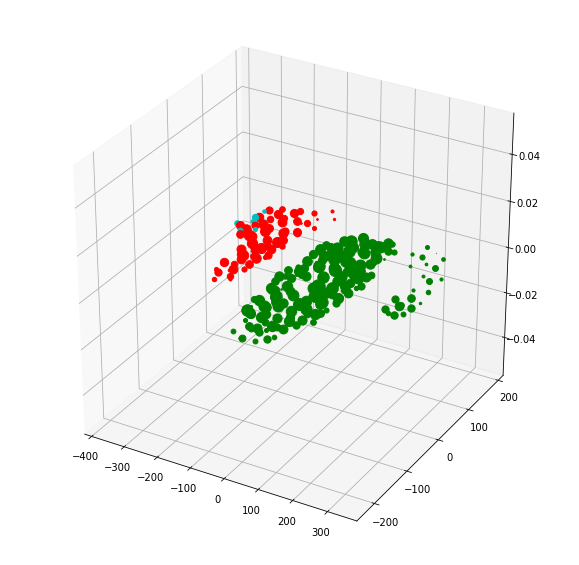

In [53]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b','black', 'c','k']
for i, val in zip(range(len(embeddings.embedding_)),kmeans.labels_):
    plt.scatter(embeddings.embedding_[i,0], embeddings.embedding_[i,1], embeddings.embedding_[i,2], c=colors[val])
plt.show()

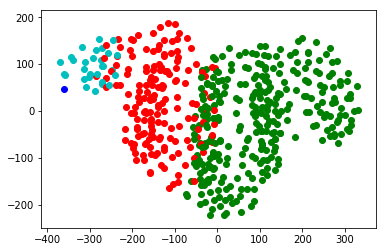

In [54]:
for i, val in zip(range(len(embeddings.embedding_)),kmeans.labels_):
    plt.scatter(embeddings.embedding_[i,0], embeddings.embedding_[i,1],c=colors[val])